<img src="TechLabs.png">

<h2>Please enter your full name here: David Moulin</h2>


<p> This exam will test your knowledge in Artificial Intelligence. </p>
<p> We will test the following: </p>

- Logistic Regressions
- Neural Networks
- Monte Carlo Simulation

# Question 1:
Below is the code to import a standard dataset with breast cancer.
When you run the cell, you will have it stored as the object "data",
and the description of the dataset is printed out for you.

### Your task is to create two models for classifying the diagnosis, and compare the accuracy metrics for the two:
### 1. a) Logistic Regression: 
"sklearn.linear_model" offers good logit classifiers. Because the dataset is fairly small (~500 rows), we suggest that you use the "liblinear" solver for fitting the logit classifier.

Split the dataset into a test and training (30% test / 70% training) dataset and train the model on the training dataset. Then, classify the test dataset, and compute the accuracy, which you can print as an output.

P.S.: We do not expect you to regularize for type 1 or type 2 errors. Your goal is to build models that classify well the diagnosis. Also, we do not expect you to spend hours on feature engineering and/or other things that may or may not improve testing accuracy. A good answer shall just contain a sensible model and the testing accuracy.

In [1]:
import numpy as np

from sklearn import datasets
data = datasets.load_breast_cancer()
print(np.shape(data.data))

(569, 30)


In [2]:
print(data.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

In [3]:
np.shape(data.feature_names)

(30,)

In [4]:
#create dataframe
from sklearn.linear_model import LogisticRegression
import pandas as pd

columns = data.feature_names
df = pd.DataFrame(data.data, columns = columns)
df

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


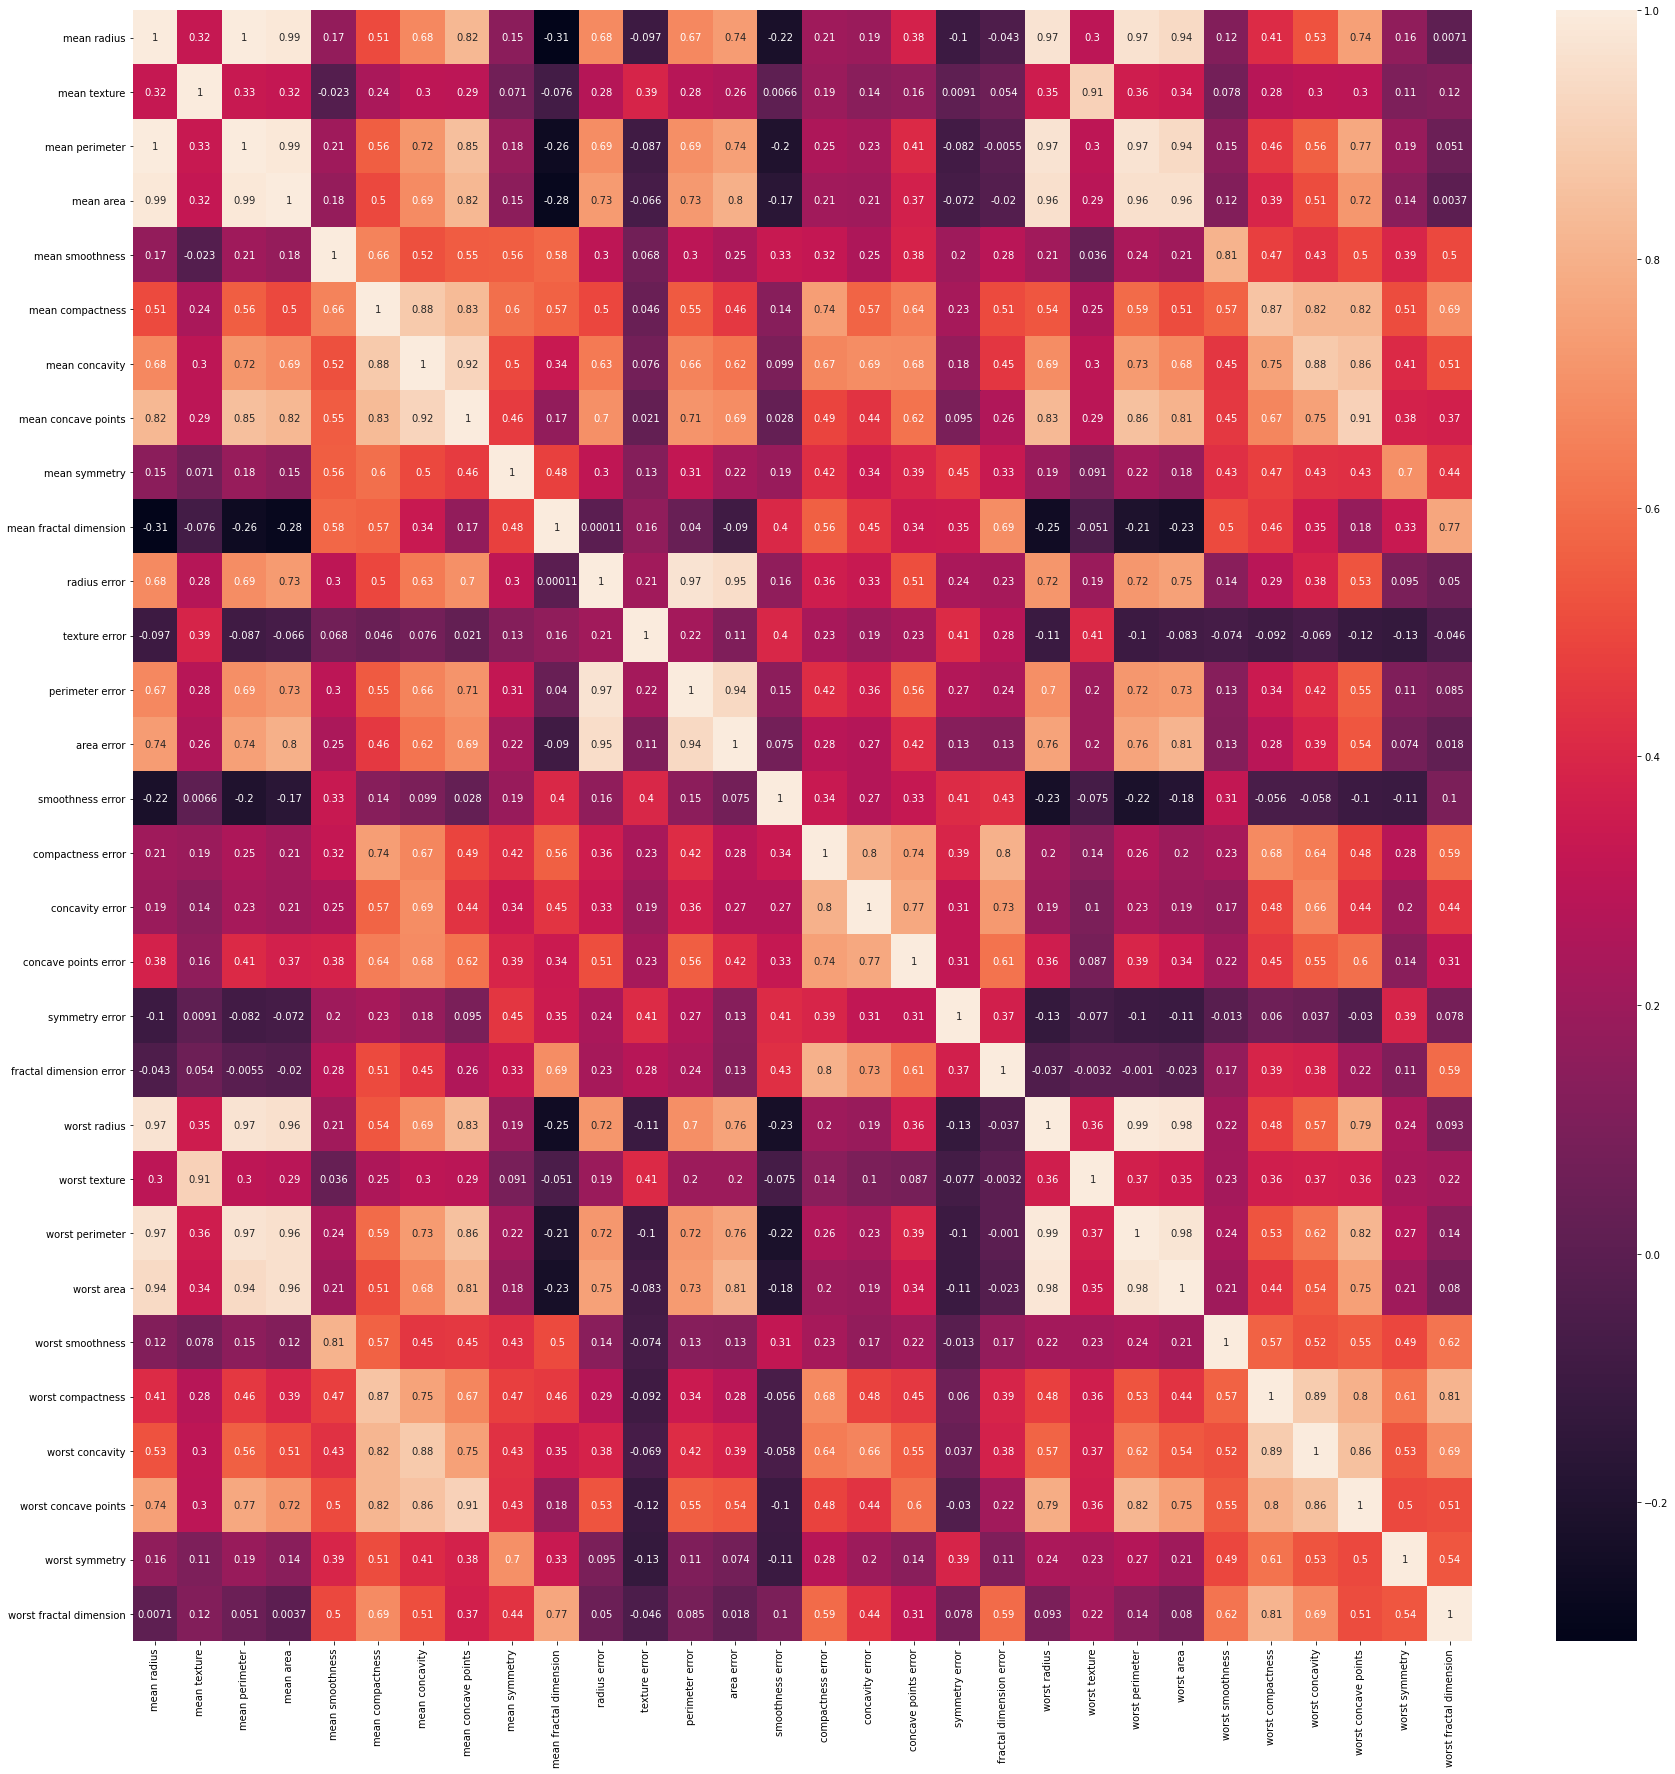

In [5]:
#correlation matrix and feature exploration

import seaborn as sn
import matplotlib.pyplot as plt


correlation_matrix = df.corr()

fig, ax = plt.subplots(figsize=(30,30))
sn.heatmap(correlation_matrix, annot = True, ax = ax)
plt.show()

In [6]:
#CREATE Target variables
y = data.target

In [7]:
seed_value = 2000

np.random.seed(seed_value)

In [8]:
#Split dataset 70/30
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df, y, test_size= 0.3)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(398, 30) (398,)
(171, 30) (171,)


In [9]:
#Create logistic regression

model = LogisticRegression(solver = 'liblinear').fit(X_train, y_train)
predictions = model.predict(X_test)
Predict_proba = model.predict_proba(X_test)
score_logitacc = model.score(X_test, y_test)

In [10]:
score_logitacc

0.9473684210526315

# Print the logit accuracy below:

In [11]:
logitacc = score_logitacc
print(f"\ntesting set accuracy with logit is: {logitacc}")


testing set accuracy with logit is: 0.9473684210526315


### 1. b) Feedforward Neural Network:
So far, so good. Let's see how a feedforward neural network does for the same task.

Take the same train/test split as in a), and construct the following neural network, which you fit to the data:

In [12]:
import pickle
pickle.loads(b'\x80\x03]q\x00(X\x15\x00\x00\x00Model: "sequential_2"q\x01XA\x00\x00\x00_________________________________________________________________q\x02XA\x00\x00\x00Layer (type)                 Output Shape              Param #   q\x03XA\x00\x00\x00=================================================================q\x04XA\x00\x00\x00dense_5 (Dense)              (None, 30)                930       q\x05XA\x00\x00\x00_________________________________________________________________q\x06XA\x00\x00\x00dense_6 (Dense)              (None, 50)                1550      q\x07XA\x00\x00\x00_________________________________________________________________q\x08XA\x00\x00\x00dense_7 (Dense)              (None, 30)                1530      q\tXA\x00\x00\x00_________________________________________________________________q\nXA\x00\x00\x00dense_8 (Dense)              (None, 1)                 31        q\x0bXA\x00\x00\x00=================================================================q\x0cX\x13\x00\x00\x00Total params: 4,041q\rX\x17\x00\x00\x00Trainable params: 4,041q\x0eX\x17\x00\x00\x00Non-trainable params: 0q\x0fXA\x00\x00\x00_________________________________________________________________q\x10e.')

['Model: "sequential_2"',
 '_________________________________________________________________',
 'Layer (type)                 Output Shape              Param #   ',
 '=================================================================',
 'dense_5 (Dense)              (None, 30)                930       ',
 '_________________________________________________________________',
 'dense_6 (Dense)              (None, 50)                1550      ',
 '_________________________________________________________________',
 'dense_7 (Dense)              (None, 30)                1530      ',
 '_________________________________________________________________',
 'dense_8 (Dense)              (None, 1)                 31        ',
 '=================================================================',
 'Total params: 4,041',
 'Trainable params: 4,041',
 'Non-trainable params: 0',
 '_________________________________________________________________']

### You can use the library keras to contruct the ANN. Since we are dealing with a classification problem, we recommend binary_crossentropy as a loss function.
Choose a reasonable batch size and epoch count and train the model.
### Here again, print the testing dataset accuracy:

In [13]:
import tensorflow as tf
tf.random.set_seed(seed_value)

In [14]:
from tensorflow import keras
from tensorflow.keras import layers


model_2 = tf.keras.models.Sequential([
    tf.keras.layers.Dense(30, activation= 'relu'),
    tf.keras.layers.Dense(50, activation= 'relu'),
    tf.keras.layers.Dense(30, activation= 'relu'),
    tf.keras.layers.Dense(1, activation= "sigmoid")])

model_2.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [15]:
model_2.fit(X_train, y_train, epochs=20, batch_size = 32)

Epoch 1/20
13/13 [==============================] - 0s 890us/step - loss: 57.3580 - accuracy: 0.5554
Epoch 2/20
13/13 [==============================] - 0s 865us/step - loss: 11.5971 - accuracy: 0.4360
Epoch 3/20
13/13 [==============================] - 0s 888us/step - loss: 2.2130 - accuracy: 0.5232
Epoch 4/20
13/13 [==============================] - 0s 974us/step - loss: 0.7060 - accuracy: 0.6748
Epoch 5/20
13/13 [==============================] - 0s 909us/step - loss: 0.2801 - accuracy: 0.8964
Epoch 6/20
13/13 [==============================] - 0s 762us/step - loss: 0.2358 - accuracy: 0.9028
Epoch 7/20
13/13 [==============================] - 0s 813us/step - loss: 0.2164 - accuracy: 0.9018
Epoch 8/20
13/13 [==============================] - 0s 775us/step - loss: 0.2241 - accuracy: 0.9204
Epoch 9/20
13/13 [==============================] - 0s 908us/step - loss: 0.1729 - accuracy: 0.9312
Epoch 10/20
13/13 [==============================] - 0s 709us/step - loss: 0.2052 - accuracy: 0.92

In [16]:
model_2.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 30)                930       
_________________________________________________________________
dense_1 (Dense)              (None, 50)                1550      
_________________________________________________________________
dense_2 (Dense)              (None, 30)                1530      
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 31        
Total params: 4,041
Trainable params: 4,041
Non-trainable params: 0
_________________________________________________________________


In [17]:
score_ANNacc = model_2.evaluate(X_test, y_test, verbose = 2)[1]

6/6 - 0s - loss: 0.2024 - accuracy: 0.9064


In [18]:
ANNacc = score_ANNacc
print(f"\ntesting set accuracy with logit is: {ANNacc}")


testing set accuracy with logit is: 0.9064327478408813


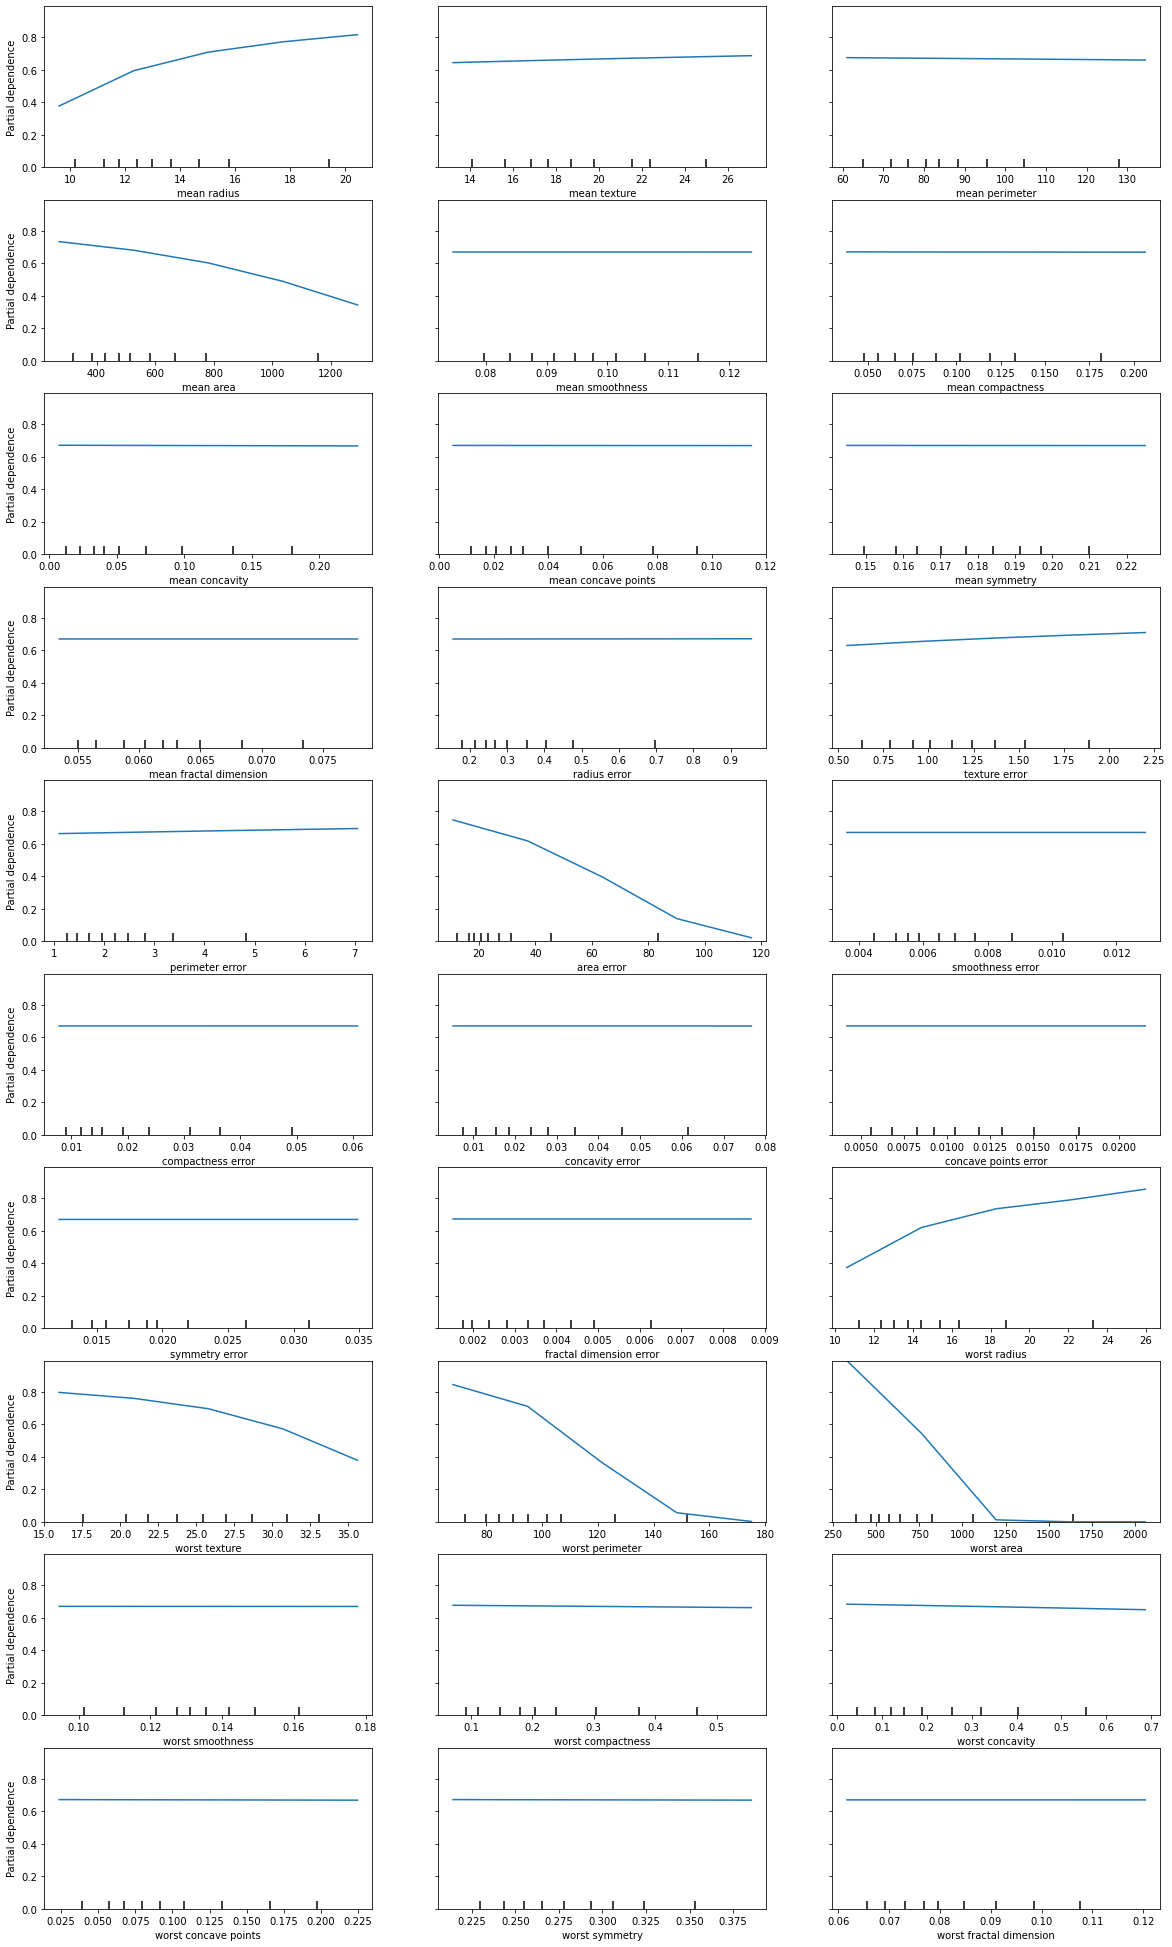

In [19]:
#partial dependence analysis
from sklearn.inspection import plot_partial_dependence

def __pd_plot__(model = model, X = X_test):
    fig, ax = plt.subplots(figsize=(20, 35))
    
    
    plot_partial_dependence(model, features = df.columns[0:len(df.columns)], X = X, grid_resolution = 5, ax= ax)
    return plt.show()


__pd_plot__()


### 1. c) Compare the performance of the neural net with the logit. Which one seems better at the job and why might that be?
Please also comment on which model you would choose to implement in a case like this and why.

In [33]:
#Pre-general thoughts: I didn't do any data engenering because the data was already clean,
#I mostly created some correlation matrix/partial dependence in order to see how features react between each others.

#1.c) The two models above have similars results - accuracy (0.9473 vs 0.9064) --> slightly better for the logistic regression
#We have to take into account in the slightly randomness of the neural network's mode that can change it's relative performance.
#To limitate this factor I used the same seed for both models.
#Personnaly, I will choose the logistic regression model because it will be easier to interpet.
#We can also conclude that the variables of this model have a linear correlation.
#However, it can be interesting to test these models with more or other metrics and look at their performance.

# Question 2:
### Your coding skills have gained you a job as an options trader at a successful hedge fund! Congratulations!!

At the first day, your boss comes to you and asks you, whether he should buy a _call option_* with a certain set of characteristics for 1€.

    *A call option gives you the right (but not obligation) to buy a share for a certain strike price. In other words, if the stock price is higher than the strike price, you get the difference, otherwise, you get 0: 
    
    callpayoff = max(stockprice - strikeprice, 0) 

To price the option, you shall build a monte-carlo simulator which generatates _1 000 000_ random walks, each representing the stock price in one year, which is when the option can be expired. By taking the average of these payouts, you will get the expected payout at expiry!

Luckily, your boss has also given you the characteristics and hints for how the stock price moves: 

The stock price follows a student T distribution with 3 degrees of freedom (the rvs function within the t class from scipy.stats package is a great tool for creating random walks with this distribution: https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.t.html  ctrl+f "rvs") 

- The stock price today: 69
- Stock returns follow student T distribution with 3 degrees of freedom
- drift of 10% per year 
- volatility of 20%
- strike price of the option is 96

### Build a function that returns the price of the call option, and shows your boss what payout he can expect from the option in order to explain him, whether he should buy it or not.

    P.S.: If you run into trouble on your way, you can always ask for tips from your boss and since he is a nice guy, he will also give a good grade for all attempts!

In [21]:
from scipy.stats import t
import matplotlib.pyplot as plt

def __var_estimate__(df = 3, random_walks = 1000000, drift = 0.1, stdev = 0.2):
    r = t.rvs(df = df, loc = drift, scale = stdev, size = random_walks)
    return r

estimates = __var_estimate__()
estimates

array([ 0.21476704,  0.03616656,  0.25324752, ...,  0.23557149,
       -0.21287853,  0.14160533])

In [22]:
def __final_payoff__(estimate, stockprice = 69, strikeprice = 96):
    payoff = max(stockprice * (estimate + 1) - strikeprice, 0)
    return payoff

def __final_price__(estimate, stockprice = 69, strikeprice = 96):
    price = stockprice * (estimate + 1)
    return price

In [23]:
final_price = []
final_payoff = []

for i in estimates:
    final_payoff.append(__final_payoff__(i))
    final_price.append(__final_price__(i))
    

In [24]:
np.mean(final_payoff)

2.0329203177554587

In [25]:
np.mean(final_price)

75.91292706973444

In [26]:
min(estimates), max(estimates), np.mean(estimates)

(-18.78828710354364, 17.22650551870893, 0.10018734883673117)

In [27]:
min(final_price), max(final_price), np.mean(final_price)

(-1227.3918101445113, 1257.6288807909161, 75.91292706973444)

In [28]:
min(final_payoff), max(final_payoff), np.mean(final_payoff)

(0, 1161.6288807909161, 2.0329203177554587)

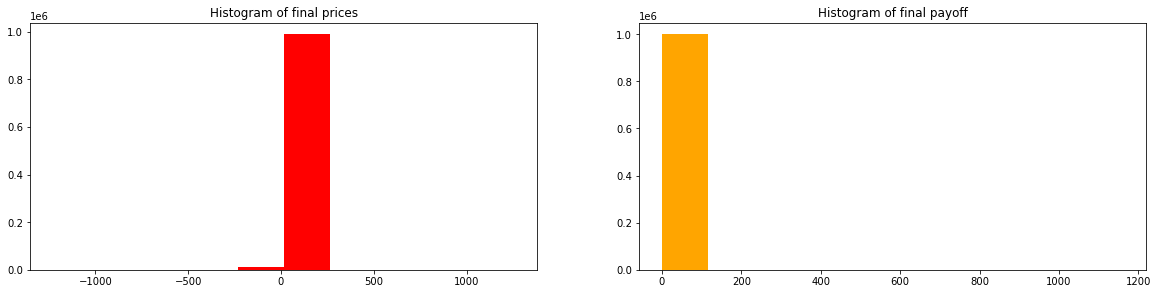

In [31]:
n_bins = 50

fig = plt.figure(figsize=(20,10))
ax = plt.subplot(2,2,1)
ax.hist(final_price, color='red')
ax.set_title('Histogram of final prices')
ax = plt.subplot(2,2,2)
ax.hist(final_payoff, color='orange')
ax.set_title("Histogram of final payoff")


plt.show()

# Good luck!

Don't forget: google, github and stack overflow are your best friends!
